In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv("../datasets/census_income/census-income-data.csv",header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199522,32,Private,42,30,High school graduate,0,Not in universe,Never married,Medical except hospital,Other service,...,?,?,?,Foreign born- Not a citizen of U S,0,Not in universe,2,52,94,- 50000.


In [3]:
cols = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42']
df.columns = cols

###  Basic statistics for this data set:

| Number of instances data = 199523
|    Duplicate or conflicting instances : 46716
| Number of instances in test = 99762
|    Duplicate or conflicting instances : 20936
| Class probabilities for income-projected.test file
| Probability for the label '- 50000' : 93.80%
| Probability for the label '50000+' : 6.20%
| Majority accuracy: 93.80% on value - 50000
| Number of attributes = 40 (continuous : 7 nominal : 33)

In [4]:
df.drop_duplicates()

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,- 50000.
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [5]:

decr = df.describe()

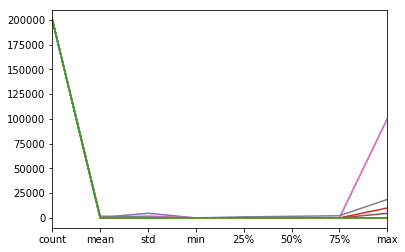

In [6]:
decr.plot(legend=False)

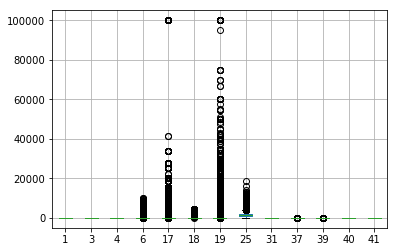

In [7]:
df.boxplot()


In [8]:
D= df.as_matrix()
print(D[1])
print("")
print(D.T[-1])

[58 ' Self-employed-not incorporated' 4 34 ' Some college but no degree' 0
 ' Not in universe' ' Divorced' ' Construction'
 ' Precision production craft & repair' ' White' ' All other' ' Male'
 ' Not in universe' ' Not in universe' ' Children or Armed Forces' 0 0 0
 ' Head of household' ' South' ' Arkansas' ' Householder' ' Householder'
 1053.55 ' MSA to MSA' ' Same county' ' Same county' ' No' ' Yes' 1
 ' Not in universe' ' United-States' ' United-States' ' United-States'
 ' Native- Born in the United States' 0 ' Not in universe' 2 52 94
 ' - 50000.']

[' - 50000.' ' - 50000.' ' - 50000.' ..., ' - 50000.' ' - 50000.'
 ' - 50000.']


In [9]:
salaryC = D.T[-1]
c1 = np.where(D.T[-1]!=' - 50000.') # which is equal to ' 50000+.'
print(c1)
c2 = np.where(D.T[-1]==' - 50000.')
print(c2)

(array([    57,     64,     68, ..., 199499, 199508, 199509]),)
(array([     0,      1,      2, ..., 199520, 199521, 199522]),)


In [10]:
D1 = D[c1]
D2 = D[c2]
print(D1.shape)
print(D2.shape)

(12382, 42)
(187141, 42)


In [11]:
dlist =[]
for col in range(0,41):
    dl = np.unique(df.ix[:,col])
    dlist.append(dl)


In [12]:
dlist[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

In [13]:
dlist[27]

array([' ?', ' Abroad', ' Different county same state',
       ' Different state in Midwest', ' Different state in Northeast',
       ' Different state in South', ' Different state in West',
       ' Nonmover', ' Not in universe', ' Same county'], dtype=object)

In [14]:
rowQM = []
for i in range(0,df.shape[0]):
    indx = np.where(D[i]==' ?')[0]
    if np.any(indx):
        X = ([i,indx])
        rowQM.append(X)
        

In [15]:
for i in range(1,10):
    print(rowQM[i][0])

2
5
7
8
11
14
16
18
19


In [16]:
# There are 104392 rows with missing values
print("Instances with Question marks or missing values: {}".format(len(rowQM)))
print("Instances without question marks or missing values: {}".format(len(D)-len(rowQM)))

Instances with Question marks or missing values: 104393
Instances without question marks or missing values: 95130


In [17]:
col = 0
df3 = df;
modevals = [];
while col < df.shape[1]:
    if ((df.ix[:,col].dtype=='int64') or (df.ix[:,col].dtype=='float64')):
        df2 = df[np.isreal(df.ix[:,col])]
        dfmean = np.mean(df2.ix[:,col])
    else:
        dfqn = df.ix[:,col]!=' ?'
        if dfqn.all() != True:
            df2 = df[dfqn]
            modecol = df2.ix[:,col].mode()[0]
            X = [col, modecol]
            modevals.append(X)
        
            df3.ix[dfqn!=True,col] = modecol
        
          
    col +=1
print("Column Number|| mode of the column")
modevals

Column Number|| mode of the column


[[21, ' Not in universe'],
 [25, ' Nonmover'],
 [26, ' Nonmover'],
 [27, ' Nonmover'],
 [29, ' Not in universe'],
 [32, ' United-States'],
 [33, ' United-States'],
 [34, ' United-States']]

In [18]:
# df1 = df
# dfU = df
col = 0
# l = []
while col < df.shape[1]:
    if df3.ix[:,col].dtype == 'object':
#         print(col)
        L = preprocessing.LabelEncoder()
        l = L.fit_transform(df3.ix[:,col])
        df3.ix[:,col] = l
#         ldf = pd.DataFrame(l)
#         ldf = ldf.join(df.ix[:,col])
#         print(ldf)
#         print(np.unique(ldf))
    col+=1
    

In [19]:
D = df.as_matrix()
D.shape

(199523, 42)

In [20]:
y = np.array(D[:,41])
print(np.unique(y))
y = np.reshape(y,(D.shape[0],1))
y.shape

[ 0.  1.]


(199523, 1)

In [21]:
X = D[:,0:41]
X.shape

(199523, 41)

In [22]:
from sklearn.naive_bayes import BernoulliNB
clfB = BernoulliNB()
clfB.fit(X, y)


/home/shravankumar/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [23]:
print(clfB.predict(X[50:60]))

[ 0.  1.  1.  0.  0.  0.  0.  1.  0.  0.]


In [24]:
from sklearn.naive_bayes import GaussianNB
clfG = GaussianNB()
clfG.fit(X,y)

GaussianNB(priors=None)

In [25]:
print(clfG.predict(X[0:10]))

[ 0.  0.  0.  0.  0.  1.  1.  0.  1.  1.]


In [26]:
res1 = clfB.predict(X[:])


In [27]:
res1= np.reshape(res1,(res1.shape[0],1))
res1.shape
y_pred = res1
y_pred.shape

(199523, 1)

In [28]:
y_true = y
y_true.shape

(199523, 1)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)*100 

81.268826150368639

In [3]:

classes = 0
def load_n_process():
    df = pd.read_csv("../datasets/census_income/census-income-data.csv", header=None)
    L = preprocessing.LabelEncoder()
    col = 0
    while col < df.shape[1]:
        if ((df[col].dtype == 'int64') or (df[col].dtype == 'float64')):
            dfqn = np.isreal(df.ix[:, col])
            df2 = df[dfqn]
            dfmean = np.mean(df2.ix[:, col])
            df.ix[dfqn != True, col] = dfmean
        else:
            dfqn = df.ix[:, col] != ' ?'
            if dfqn.all() != True:
                df2 = df[dfqn]
                modecol = df2.ix[:, col].mode()[0]
                df.ix[dfqn != True, col] = modecol
            df.ix[:, col] = L.fit_transform(df.ix[:, col])
            df.ix[:,col] = df.ix[:,col].astype('category')
        col += 1

    return df

def calculculateProbs(df):
    probs = {}
    global classes
    classes = np.unique(df.ix[:,41])
    priorProb = {}
    classProb={}

    for cls in classes:
        priorProb[cls] = np.log(df.ix[df.ix[:, 41] == cls, 41].size/float(df.shape[0]))
        col = 0
        colprob={}
        while col < df.shape[1] -1:

            if ((df[col].dtype == 'int64') or (df[col].dtype == 'float64')):
               probd = {}
               dfc = df.ix[df.ix[:, 41] == cls, col]
               probd['mean'] =  dfc.mean()
               probd['variance'] =  dfc.var()
               colprob[col] = probd
            else:

                dfc = df[df.ix[:, 41] == cls]
                cats = np.unique(dfc.ix[:,col])

                catprob = {}
                for cat in cats:
                    catprob[cat] = dfc[dfc.ix[:, col] == cat].size/float(dfc.size)
                colprob[col] = catprob

            col +=1
        classProb[cls] = colprob


    probs['priorProb'] = priorProb
    probs['classCondProb'] = classProb
    return probs


def predict(dataset, probs ):

    global classes
    row =0
    result = []
    while row < dataset.shape[0]:

        posteriorClassProbs = {}
        predictedClass = 0
        for cls in classes:
            posteriorProb = 0
            col=0
            while col < dataset.shape[1]:

                if ((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
                    mean = probs['classCondProb'][cls][col]['mean']
                    variance = probs['classCondProb'][cls][col]['variance']
                    x= dataset.iloc[row][col]
                    posteriorProb += (np.square(x-mean)/(float)(2*variance) + np.log(float(np.sqrt(2*np.pi*variance))))*(-1)
                else:
                    cat = dataset.iloc[row][col]
                    if probs['classCondProb'][cls][col].has_key(cat):
                        posteriorProb += np.log(probs['classCondProb'][cls][col][cat])
                col += 1
            posteriorProb += probs['priorProb'][cls]
            posteriorClassProbs[posteriorProb] = cls

        posteriorClassProb = 0
        for prob in posteriorClassProbs.keys():
            if posteriorClassProb == 0 or posteriorClassProb < prob:
                posteriorClassProb =  prob
                predictedClass = posteriorClassProbs[prob]


        result.append(predictedClass)
        row += 1
    return result


df = load_n_process()

for i in range(1,30):               
    kf = KFold(n_splits=10)
    accuracy=[]
    accuracy_iter = []
    for train, test in kf.split(df):
        X_train, X_test = df.ix[train,:], df.ix[test, :]
        Y_test = X_test.ix[:,41]
        Y_test = Y_test.astype('int')
        Y_test = pd.DataFrame(Y_test)
        probs = calculculateProbs(X_train)
        accuracy_iter.append(100 - (np.sum(np.abs(Y_test[41] - predict(X_test.ix[:,:-1], probs)))/float(Y_test.shape[0]))*100)
    accuracy_iter_mean = np.mean(accuracy_iter)
    std_deviation = np.sqrt(np.var(accuracy_iter))
    accuracy.append(accuracy_iter_mean)
acc_mean = np.mean(accuracy)
acc_std = np.std(accuracy)

print("acc : {}".format(acc_mean))
print("std : {}".format(acc_std))   



acc : 93.7941978907
std : 0.0
